<a href="https://colab.research.google.com/github/SKitavi/Smarthive-ai/blob/main/SmartHive_AI_customer_segmentation_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name: SmartHive AI**

## Project Type - Unsupervised ML

## **Github**

Link: https://github.com/SKitavi/Smarthive-ai

## **Problem Statement**

In Kenya's competitive retail market, small businesses often face challenges in effectively targeting and engaging a diverse customer base. Ineffective marketing strategies, stemming from a lack of detailed customer insights, lead to wasted marketing budgets and missed revenue opportunities. For small businesses, these inefficiencies can result in marketing costs increasing by up to 30% and customer retention rates dropping by 20%. To address these challenges, SmartHive AI offers a data-driven customer segmentation model tailored for small businesses, aiming to improve marketing efficiency, increase revenue by up to 15%, and enhance customer retention by 25%.

**Stakeholders:** Marketing Team, Sales Team, Product Development Team.


## **Objectives**


*   Build a data-driven model to segment customers based on their purchasing behaviour, demographics, preferences, and engagement patterns.
*   Measure and Evaluate the Impact of Segmentation Strategies

*   Deploy these capabilities through an interactive dashboard,or web
application enabling marketing teams to visualise segments, execute targeted campaigns, and monitor their performance in real-time.


# **1. Data Collection and Preparation**

For this project, we will mainly be using the Online Retail.xlsx dataset. The dataset includes features such as customer demographics, purchase history, frequency of purchases, monetary value of purchases, and other relevant variables that can help in segmenting customers effectively.

## Data Description

Attribute Information:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description:** Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.

**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country:** Country name. Nominal, the name of the country where each customer resides.

# **Importing Libraries**

In [ ]:
#imorting important libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from numpy import math

### **Data Loading and Preview**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the excel file and preview using head()
retail_df=pd.read_excel('/content/drive/MyDrive/Market Segmentation/Online Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#.tail() reads bottom 5 records
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### **Observations**
* Datatype of InvoiceDate is object need to convert it into datatime.
* If InvoiceNo starts with C means it's a cancellation. We need to drop these entries.


In [ ]:
# shape of dataset
retail_df.shape

(541909, 8)

* There are 541,909 rows/records and 8 columns in this dataset.

In [ ]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
# Let's check the null values count.
retail_df.isnull().sum().sort_values(ascending=False)

,0
CustomerID,135080
Description,1454
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


* There are null values in CustomerID and Description.

In [ ]:
# Count the number of duplicates
duplicate_count = retail_df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 5268


In [ ]:
# Count the number of unique rows
unique_rows_count = retail_df.drop_duplicates(keep='first').shape[0]
print("\nNumber of unique rows:", unique_rows_count)

# Check for unique values in specific columns
# For example, to check the uniqueness of 'CustomerID' column:
unique_customer_count = retail_df['CustomerID'].nunique()
print("\nNumber of unique customers:", unique_customer_count)


Number of unique rows: 536641

Number of unique customers: 4372


In [ ]:
#Summary Statistics for Numerical Features

print("\nSummary Statistics:")
retail_df.describe().T


Summary Statistics:


,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


### **Data Cleaning**

Text(0.5, 1.0, ' Visualising Missing Values')

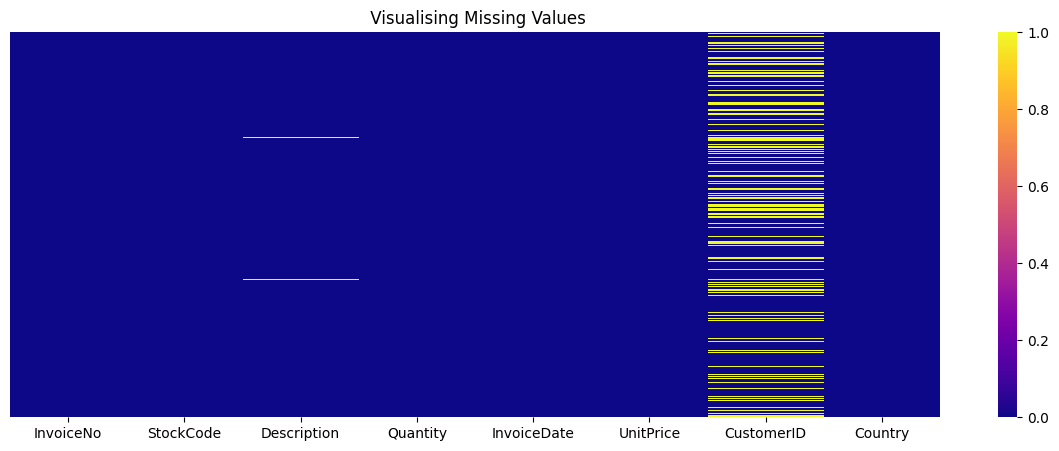

In [ ]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(retail_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

### **Observations**
* Missing values in CustomerID and Description columns.
* CustomerID is our identification feature so if its missing means other wont help us in analysis

* Dropping that all missing datapoints

In [ ]:
retail_df.dropna(inplace=True)

In [ ]:
retail_df.shape

(406829, 8)

* Now we have 406,829 records after removing null datapoints.

In [ ]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


* Here we can see that min value for Quantity column is negative.
* UnitPrice has 0 as min value
* Need to Explore these columns

In [ ]:
# dataframe have negative valiues in quantity.
retail_df[retail_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


* Here we observed that Invoice number starting with C has negative values and as per description of the data those are cancelations. So we need to drop these entries.

In [ ]:
# changing the datatype to str
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')

In [ ]:
# also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
retail_df=retail_df[~retail_df['InvoiceNo'].str.contains('C')]

In [ ]:
# Checking how many values are present for unitprice==0
# almost 40 values are present so will drop this values
len(retail_df[retail_df['UnitPrice']==0])

40

In [ ]:
# taking unitprice values greater than 0.
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


* Now our values are okay and we have eliminated the negative and zero minimums

In [ ]:
retail_df.shape

(397884, 8)

* We have 397,884 datapoints left after cleaning.

# **Feature Engineering**

In [ ]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26.
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%d-%m-%Y %H:%M")

In [ ]:
retail_df["year"] = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df["month_num"] = retail_df["InvoiceDate"].apply(lambda x: x.month)
retail_df["day_num"] = retail_df["InvoiceDate"].apply(lambda x: x.day)
retail_df["hour"] = retail_df["InvoiceDate"].apply(lambda x: x.hour)
retail_df["minute"] = retail_df["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [ ]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

In [ ]:
retail_df['TotalAmount']=retail_df['Quantity']*retail_df['UnitPrice']

In [ ]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


# **EDA(Exploratory Data Analysis)**

In [ ]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

### **1. Univariate Analysis**

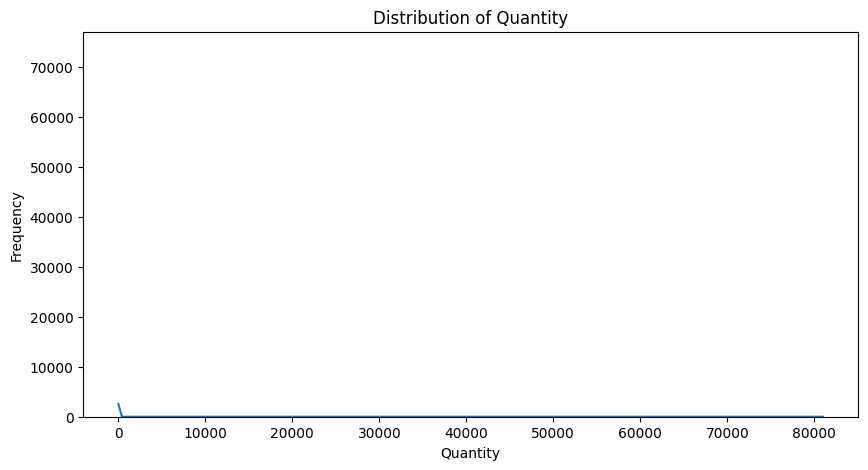

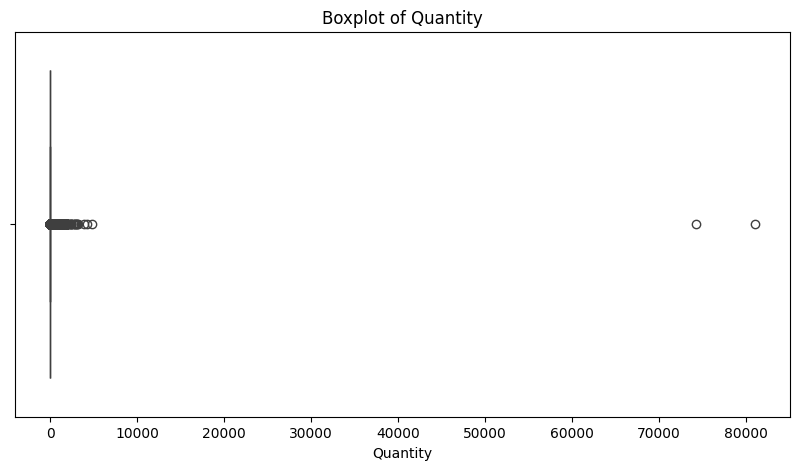


Summary Statistics for Quantity:
count    397884.000000
mean         12.988238
std         179.331775
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


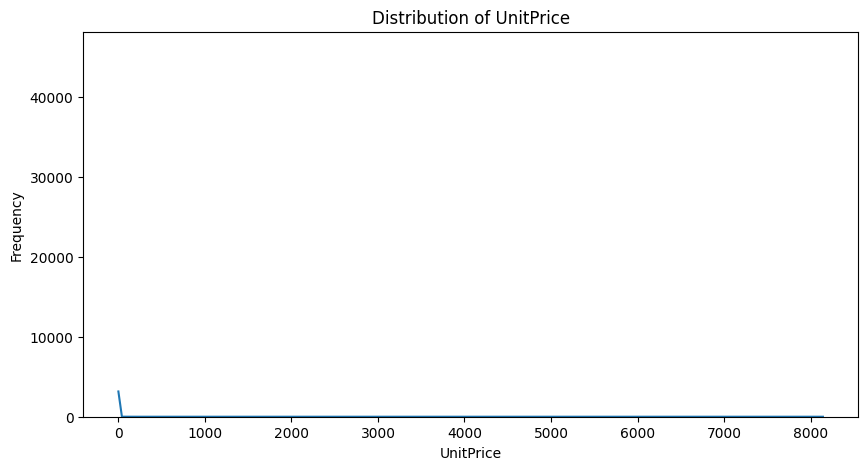

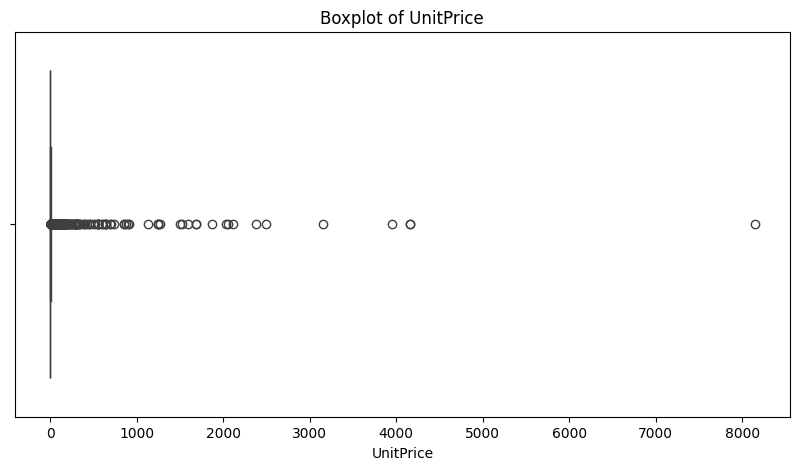


Summary Statistics for UnitPrice:
count    397884.000000
mean          3.116488
std          22.097877
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64


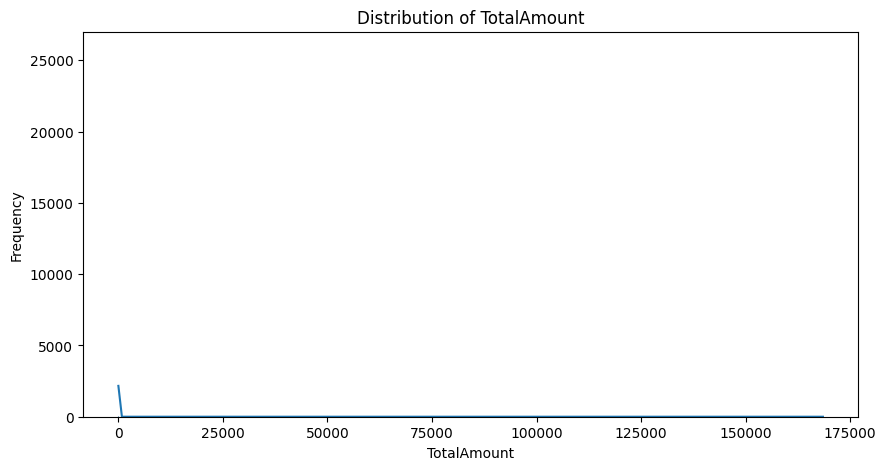

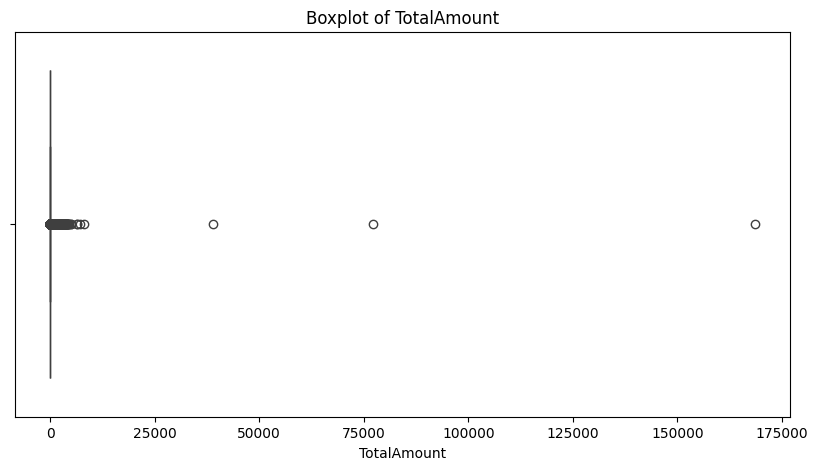


Summary Statistics for TotalAmount:
count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64


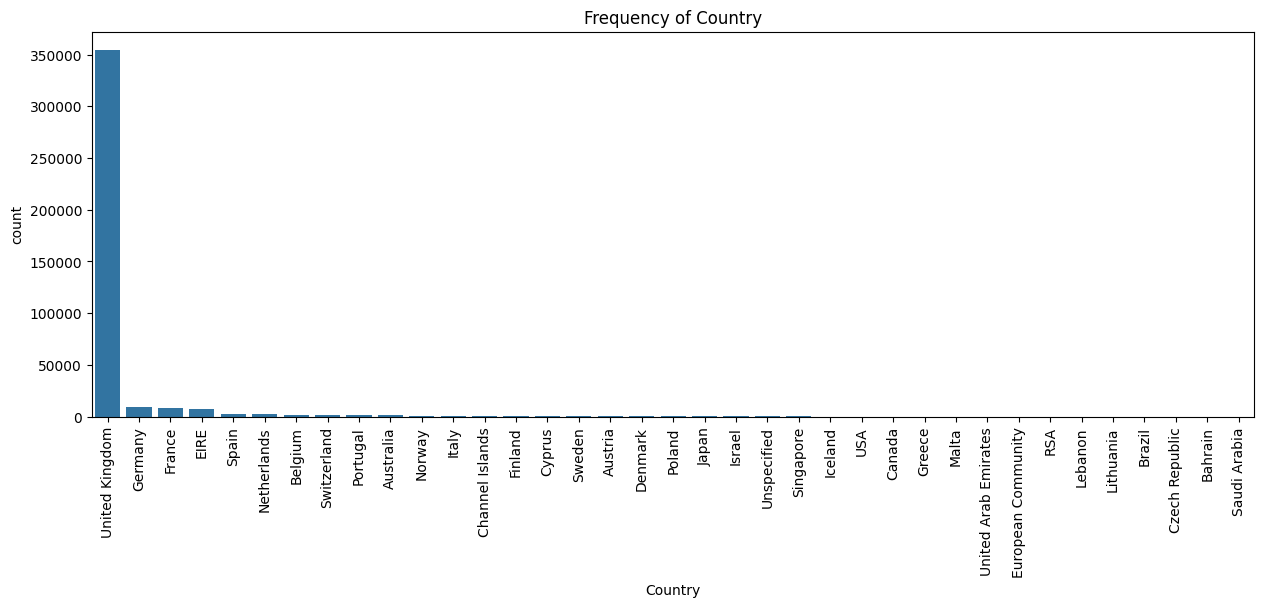


Value Counts for Country:
Country
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Leba

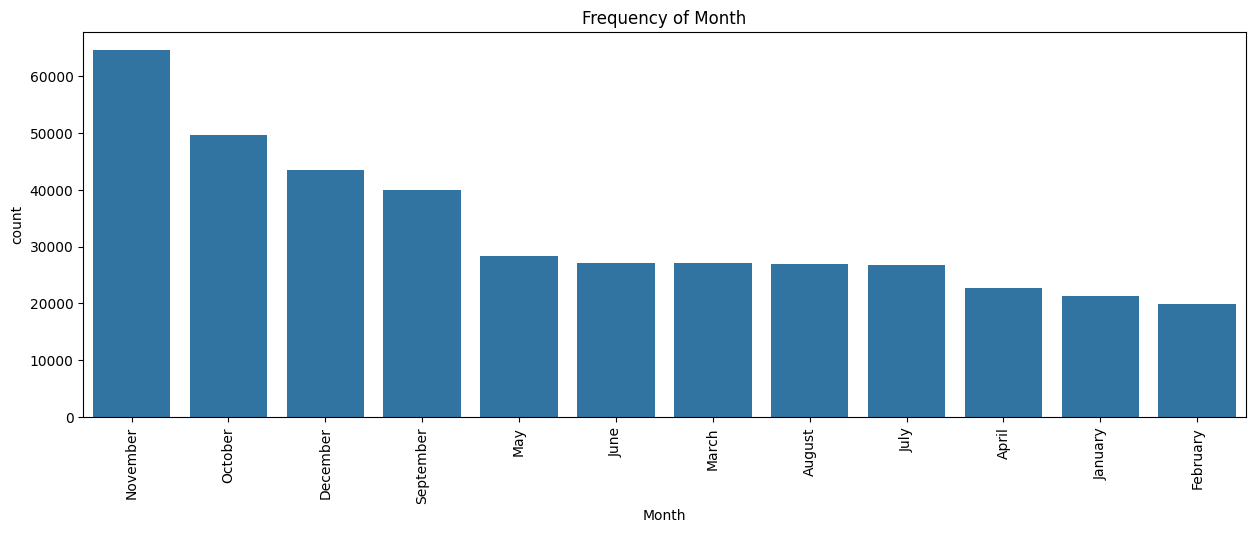


Value Counts for Month:
Month
November     64531
October      49554
December     43461
September    40028
May          28320
June         27185
March        27175
August       27007
July         26825
April        22642
January      21229
February     19927
Name: count, dtype: int64


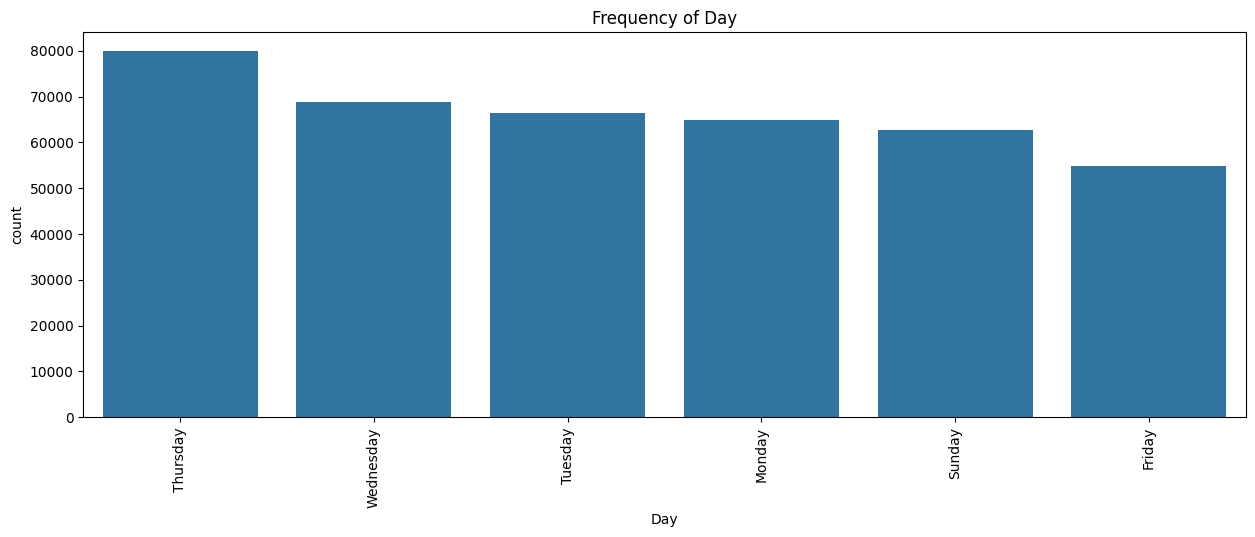


Value Counts for Day:
Day
Thursday     80035
Wednesday    68885
Tuesday      66473
Monday       64893
Sunday       62773
Friday       54825
Name: count, dtype: int64


In [ ]:
# Univariate Analysis for Numerical Features
numerical_features = ['Quantity', 'UnitPrice', 'TotalAmount']

for feature in numerical_features:
  plt.figure(figsize=(10, 5))
  sns.histplot(retail_df[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

  plt.figure(figsize=(10, 5))
  sns.boxplot(x=retail_df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

  print(f"\nSummary Statistics for {feature}:")
  print(retail_df[feature].describe())

# Univariate Analysis for Categorical Features
categorical_features = ['Country', 'Month', 'Day']

for feature in categorical_features:
  plt.figure(figsize=(15, 5))
  sns.countplot(x=retail_df[feature], order=retail_df[feature].value_counts().index)
  plt.title(f'Frequency of {feature}')
  plt.xticks(rotation=90)
  plt.show()

  print(f"\nValue Counts for {feature}:")
  print(retail_df[feature].value_counts())

### **2.** **Bivariate** **Analysis**

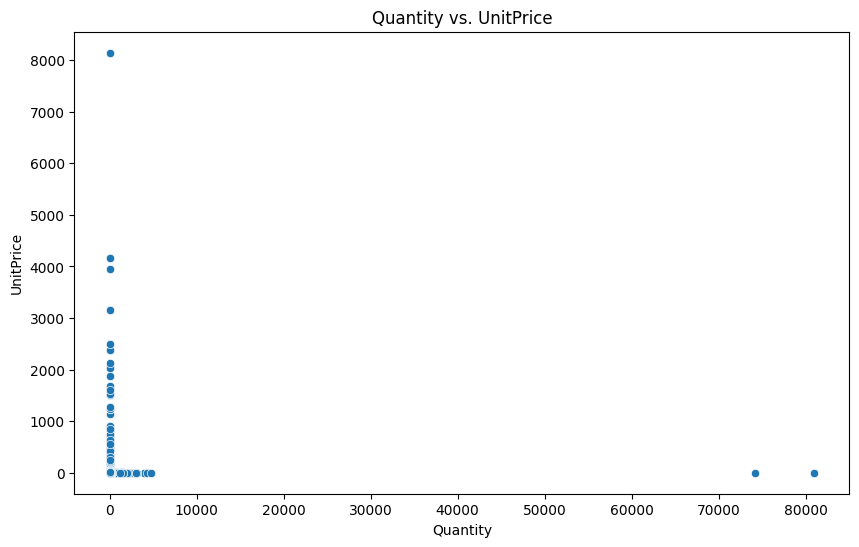

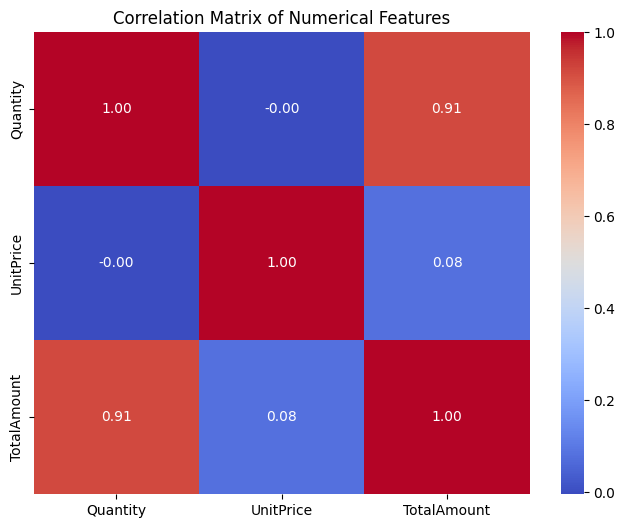

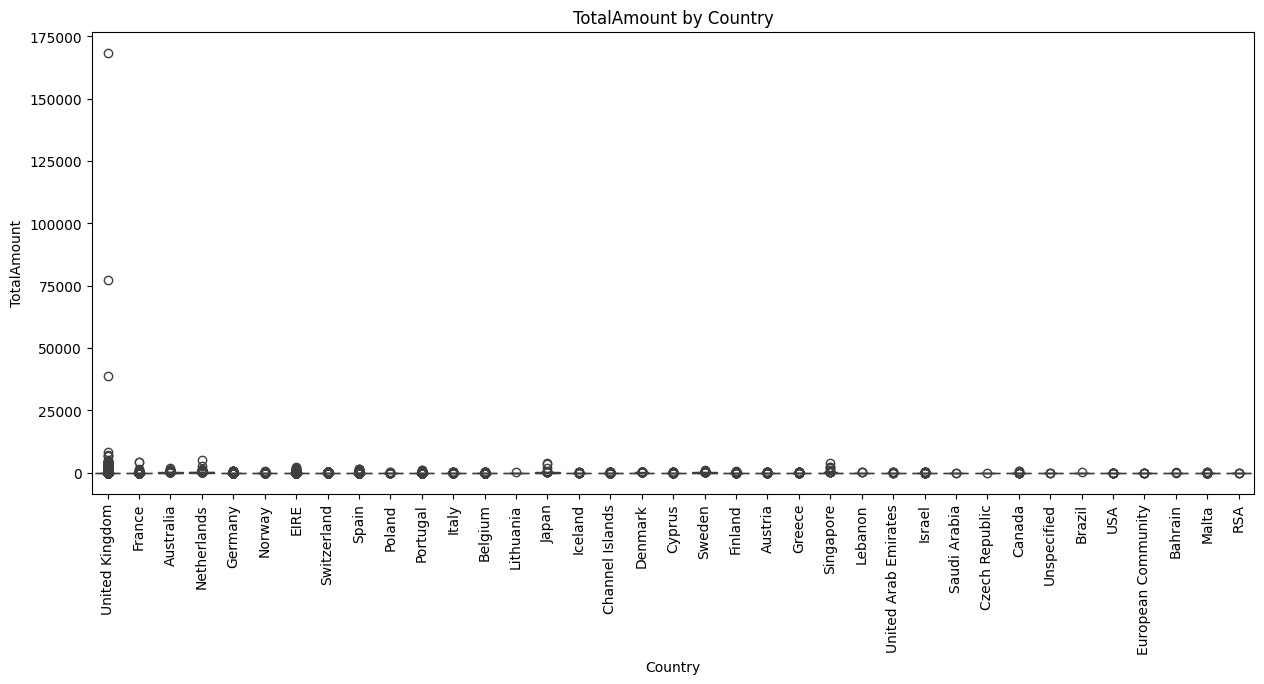

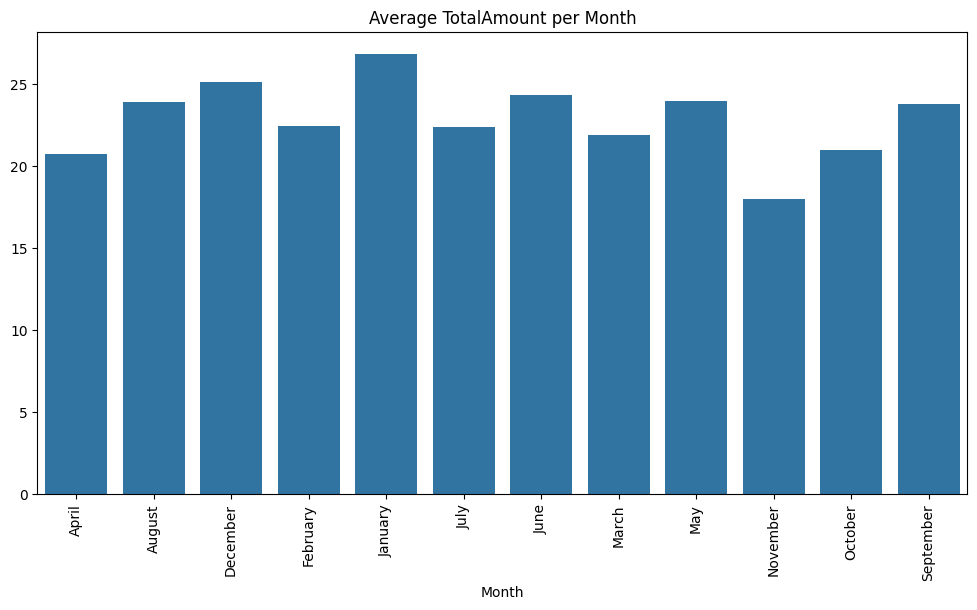

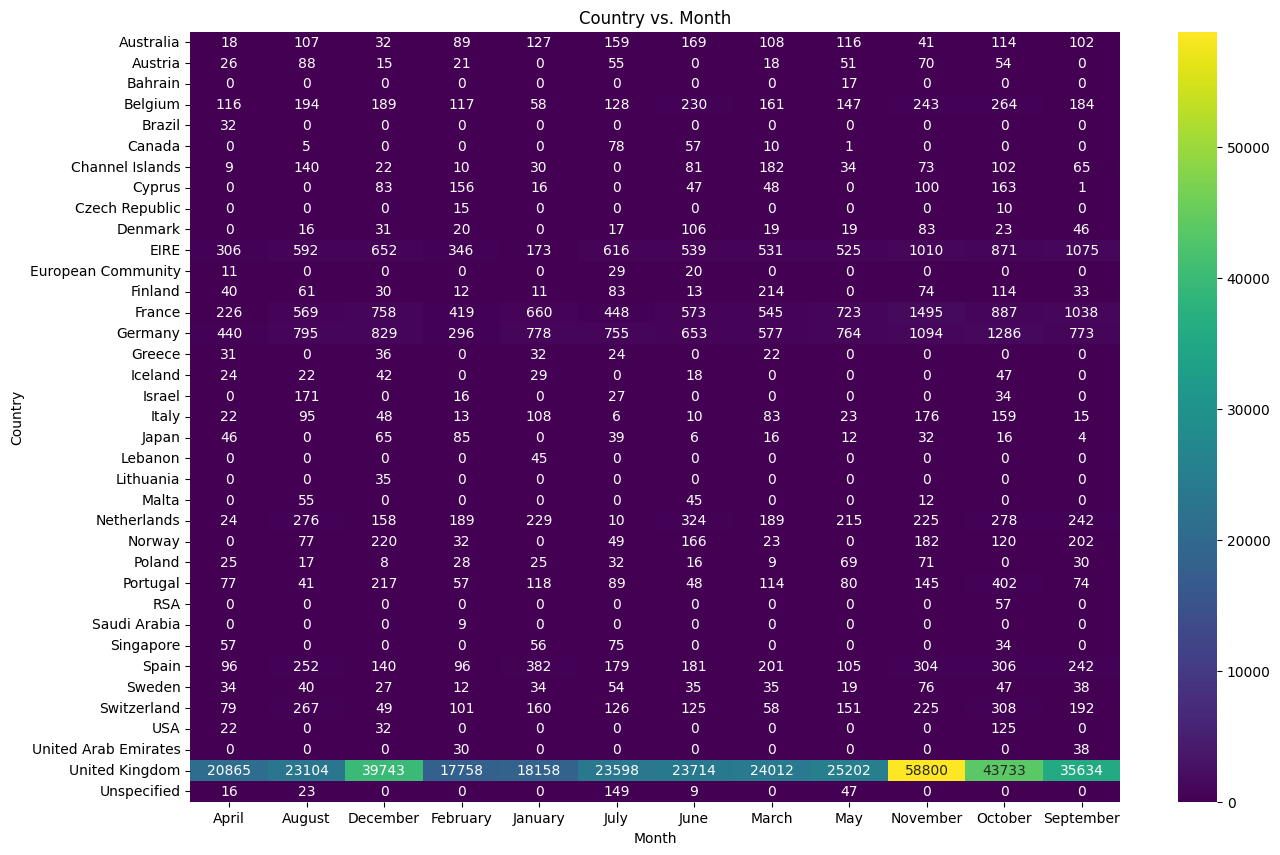

In [ ]:
# Bivariate Analysis: Numerical vs. Numerical
# 1. Scatter plot: Quantity vs. UnitPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=retail_df)
plt.title('Quantity vs. UnitPrice')
plt.show()

# 2. Correlation matrix: Correlation between numerical features
correlation_matrix = retail_df[['Quantity', 'UnitPrice', 'TotalAmount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Bivariate Analysis: Numerical vs. Categorical
# 1. Boxplot: TotalAmount vs. Country
plt.figure(figsize=(15, 6))
sns.boxplot(x='Country', y='TotalAmount', data=retail_df)
plt.title('TotalAmount by Country')
plt.xticks(rotation=90)
plt.show()

# 2. Bar plot: Average TotalAmount per Month
plt.figure(figsize=(12, 6))
average_amount_per_month = retail_df.groupby('Month')['TotalAmount'].mean()
sns.barplot(x=average_amount_per_month.index, y=average_amount_per_month.values)
plt.title('Average TotalAmount per Month')
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis: Categorical vs. Categorical
# 1. Contingency table and heatmap: Country vs. Month
contingency_table = pd.crosstab(retail_df['Country'], retail_df['Month'])
plt.figure(figsize=(15, 10))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')
plt.title('Country vs. Month')
plt.show()

* **Top 10 items in terms of description(Name)**

In [ ]:
top_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_product

,Count,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


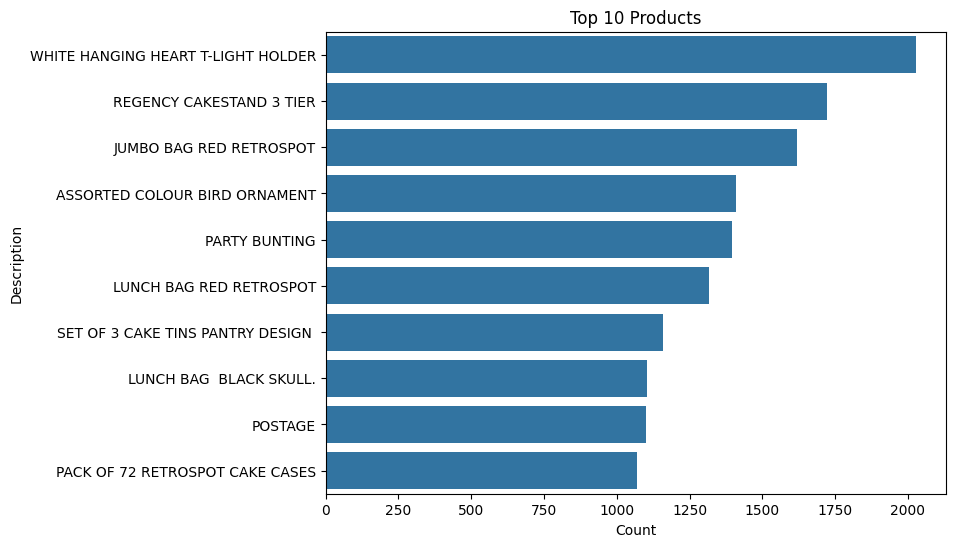

In [ ]:
top_10_product = retail_df.groupby('Description').size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)
# Plotting the top 10 products
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(x='Count', y='Description', data=top_10_product)
plt.title('Top 10 Products')
plt.show()


#### **Observations**
* WHITE HANGING HEART T-LIGHT HOLDER	is the highest selling product almost 2018 units were sold
* REGENCY CAKESTAND 3 TIER is the 2nd highest selling product almost 1723 units were sold

#### **Top 10 items in terms of StockCode.**

In [ ]:
top_10_StockCodes=retail_df.groupby('StockCode').size().reset_index(name='Count').sort_values(by='Count',ascending=False).head(10)


Text(0.5, 1.0, 'Top 10 products in terms of Stock Code')

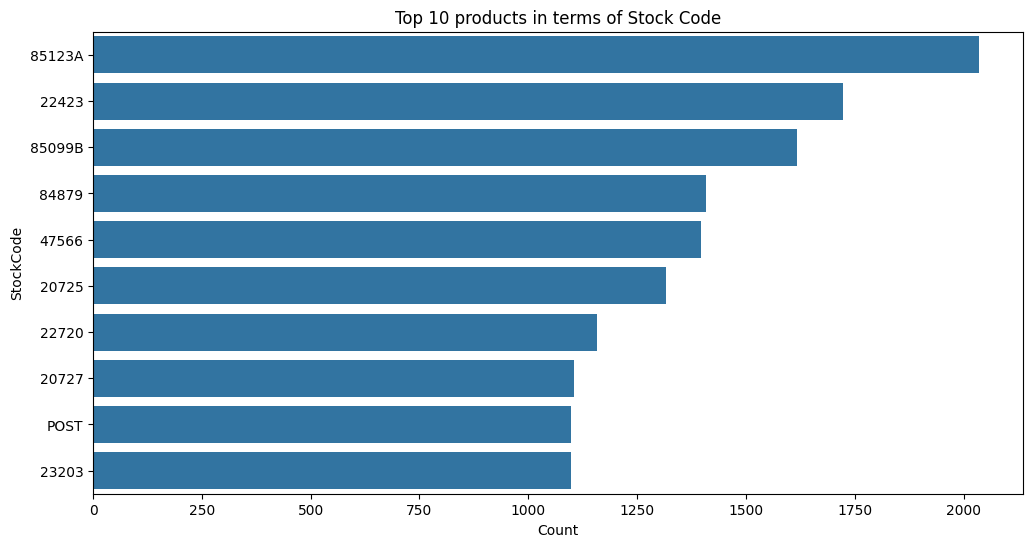

In [ ]:
# top 10 product in terms of StcokCode
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_StockCodes['Count'],y=top_10_StockCodes['StockCode'])
plt.title('Top 10 products in terms of Stock Code')

#### **Observations**
* StockCode-85123Ais the first highest selling product.
* StockCode-22423 is the 2nd highest selling product.

#### **Top 5 countries with highest number of customers**

In [ ]:
top_5_countries=retail_df.groupby('Country').size().reset_index(name='Customer_count').sort_values(by='Customer_count',ascending=False).head(5)

Text(0.5, 1.0, 'Top 5 Countries based on highest number of customers')

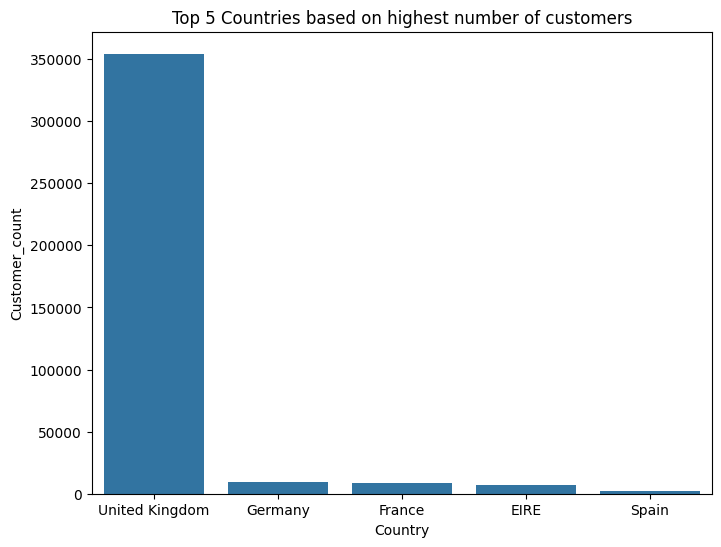

In [ ]:
# top 5 countries where max sell happens.
plt.figure(figsize=(8,6))
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['Customer_count'].head(5))
plt.title('Top 5 Countries based on highest number of customers')

#### **Observation**
* UK has highest number of customers
* Germany,France and IreLand has almost equal number of customers

In [ ]:
# top 5 countries where max sell happens.
bottom_5_countries=retail_df.groupby('Country').size().reset_index(name='Customer_count').sort_values(by='Customer_count',ascending=True).head(5)
bottom_5_countries

,Country,Customer_count
28,Saudi Arabia,9
2,Bahrain,17
8,Czech Republic,25
4,Brazil,32
21,Lithuania,35


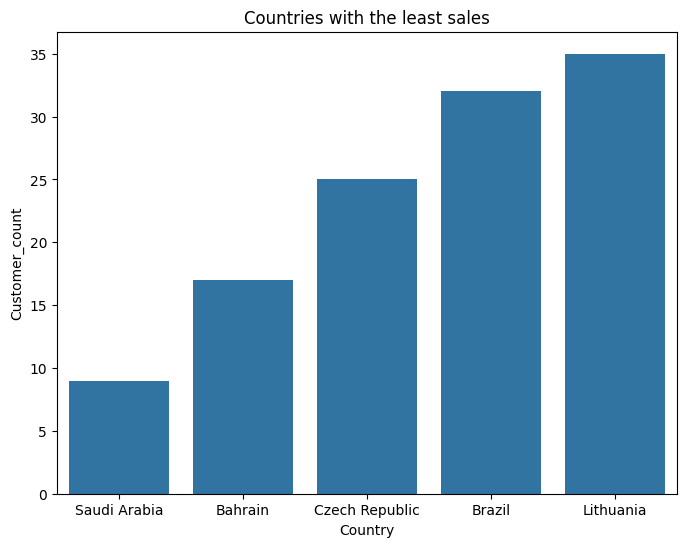

In [ ]:
# barplot of countries with the least cutomers
plt.figure(figsize=(8,6))
sns.barplot(x=bottom_5_countries['Country'].head(5),y=bottom_5_countries['Customer_count'].head(5))
plt.title('Countries with the least sales');

## **Observations**
* There are very less customers from Saudi Arabia
* Bahrain is the 2nd Country having least number of customers

In [ ]:
sales_in_month=retail_df.groupby('Month').size().reset_index(name='Sales_count').sort_values(by='Sales_count',ascending=False)
sales_in_month

,Month,Sales_count
9,November,64531
10,October,49554
2,December,43461
11,September,40028
8,May,28320
6,June,27185
7,March,27175
1,August,27007
5,July,26825
0,April,22642


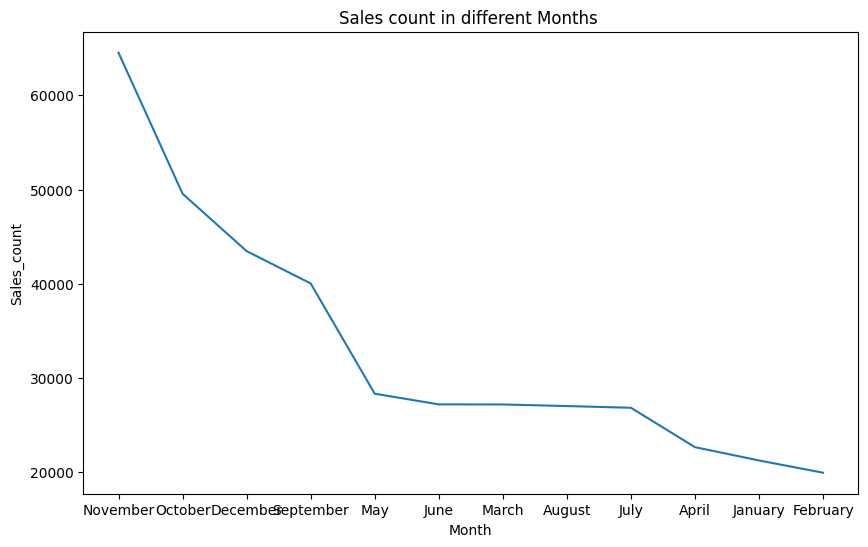

In [ ]:
# Sales count in different months.
plt.figure(figsize=(10,6))
sns.lineplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ');

##**Observations**
* Most of the sale happened in Novmenber month.
* February Month had least sales.

## **Data Preprocessing**

In [ ]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


In [ ]:
retail_df.drop_duplicates(inplace=True)


# **Model Building**

## **RFM Model Analysis:**

###**What is RFM?**
**RFM (Recency, Frequency, Monetary)** analysis is a widely used customer segmentation technique in marketing and analytics. It helps businesses understand and categorize their customers based on three key factors:
* How recently they made a purchase **(Recency)**,
* How frequently they make purchases **(Frequency)**,
* How much they spend **(Monetary value)**.

RFM analysis enables businesses to identify and target different customer segments with customized marketing approaches.

### **Why it is Needed?**
RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors RECENCY, Frequency, and Monetary.

The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.

In [ ]:
df=retail_df.copy()

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   year         392692 non-null  int64         
 9   month_num    392692 non-null  int64         
 10  day_num      392692 non-null  int64         
 11  hour         392692 non-null  int64         
 12  minute       392692 non-null  int64         
 13  Month        392692 non-null  object        
 14  Day          392692 non-null  object        
 15  TotalAmount  392692 non-null  float64  

- RFM (Recency, Frequency, Monetary) analysis is a popular marketing technique to segment customers based on their purchasing behavior. It focuses on three factors:

- Recency (R): How recently a customer made a purchase.
- Frequency (F): How often a customer makes a purchase.
- Monetary (M): How much money a customer has spent in total.

In [ ]:
# Set a reference date for Recency calculation
# You need to decide on a reference date (usually the most recent transaction date in your dataset) to compute the Recency metric
# we'll use the latest InvoiceDate in the dataset as the reference.
reference_date = df['InvoiceDate'].max()
print("Reference date:", reference_date)
##calculating recency
# Recency refers to the number of days since the customer's last purchase.
# Group by CustomerID and calculate Recency as the difference in days from the reference date
# Group by CustomerID and calculate Recency as the difference in days from the reference date
recency_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days
}).reset_index()

# Rename the column for clarity
recency_df.columns = ['CustomerID', 'Recency']


Reference date: 2011-12-09 12:50:00


- **Calculate Frequency**

Frequency is the number of unique purchases made by each customer. We count the number of unique InvoiceNo entries per customer.

In [ ]:
# Group by CustomerID and count unique InvoiceNo
frequency_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique'
}).reset_index()

# Rename the column
frequency_df.columns = ['CustomerID', 'Frequency']


- **Calculate Monetary Value**

Monetary value is the total amount of money each customer has spent. We'll sum the TotalAmount per customer.

In [ ]:
# Group by CustomerID and sum TotalAmount to calculate Monetary value
monetary_df = df.groupby('CustomerID').agg({
    'TotalAmount': 'sum'
}).reset_index()

# Rename the column
monetary_df.columns = ['CustomerID', 'Monetary']


- **Merge R, F, M Metrics**

Now that we have calculated Recency, Frequency, and Monetary values, let's combine them into a single DataFrame.



In [ ]:
# Merge Recency, Frequency, and Monetary dataframes
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

# Inspect the combined RFM data
rfm_df.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


- **Scoring the RFM Metrics**

To standardize the RFM values, we'll assign scores between 1 and 5 using quantiles.

In [ ]:
# Score Recency
# Lower Recency values are better, so we assign higher scores for lower Recency.
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])

# : Score Frequency
# Higher Frequency values are better, so we assign higher scores for higher Frequency.
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# .3: Score Monetary
# Higher Monetary values are better, so we assign higher scores for higher Monetary values.
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# We can now combine the R_Score, F_Score, and M_Score to create a unified RFM score. This score can be used to segment customers
# Concatenate R, F, M scores
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Display the first few rows of the final RFM data
rfm_df.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,325,1,77183.60,1,1,5,115
1,12347.0,1,7,4310.00,5,5,5,555
2,12348.0,74,4,1797.24,2,4,4,244
3,12349.0,18,1,1757.55,4,1,4,414
4,12350.0,309,1,334.40,1,1,2,112


In [ ]:
# Sum up R_Score, F_Score, and M_Score
rfm_df['RFM_Sum'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)
# Categorize customers based on quartiles of the RFM sum
rfm_df['Customer_Category'] = pd.cut(
    rfm_df['RFM_Sum'],
    bins=[0, 5, 10, 15, 20],  # Adjust based on your data distribution
    labels=['Low', 'Medium', 'High', 'Very High']
)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Sum,Customer_Category
0,12346.0,325,1,77183.60,1,1,5,115,7,Medium
1,12347.0,1,7,4310.00,5,5,5,555,15,High
2,12348.0,74,4,1797.24,2,4,4,244,10,Medium
3,12349.0,18,1,1757.55,4,1,4,414,9,Medium
4,12350.0,309,1,334.40,1,1,2,112,4,Low


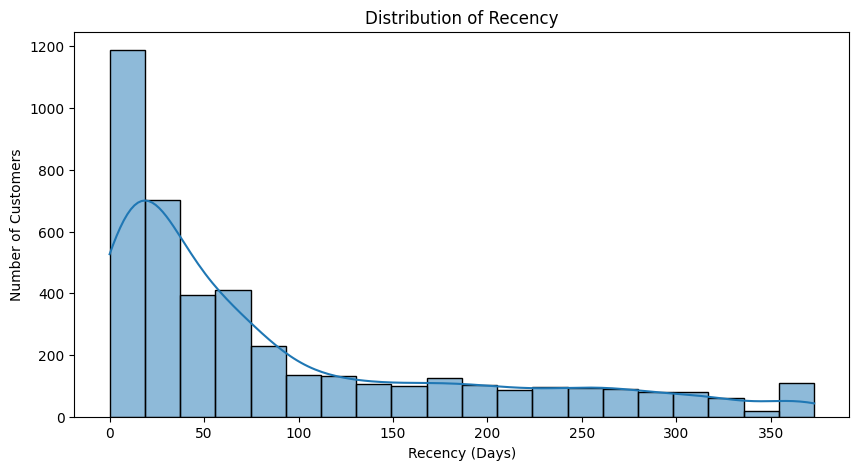

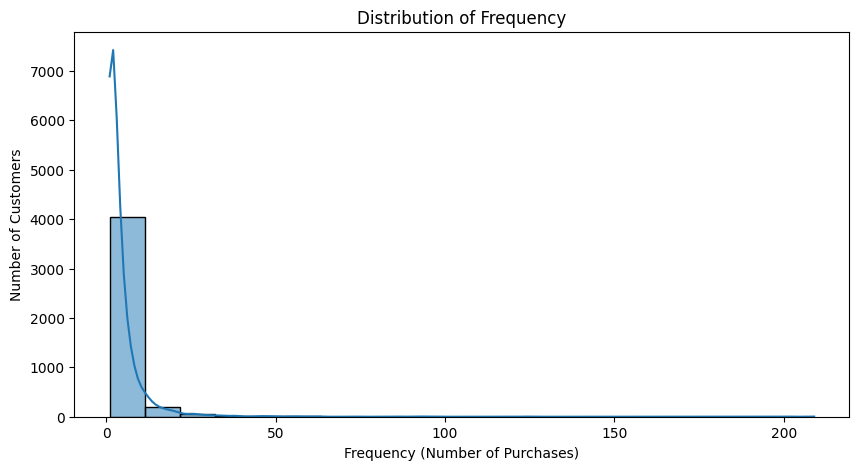

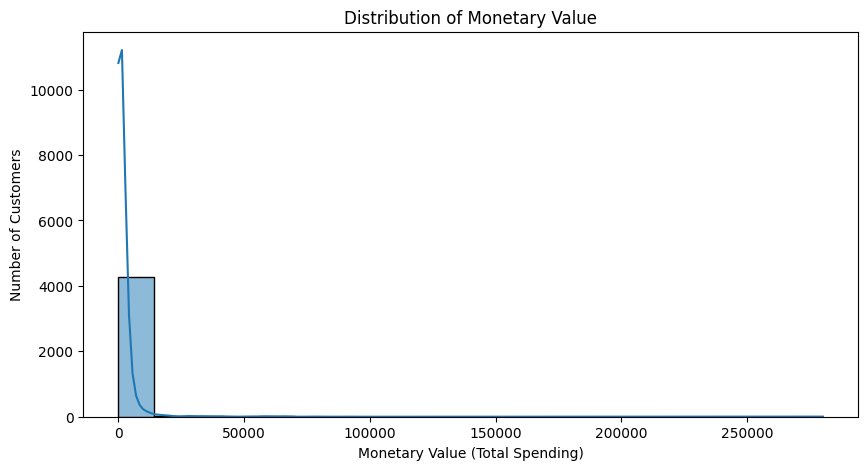

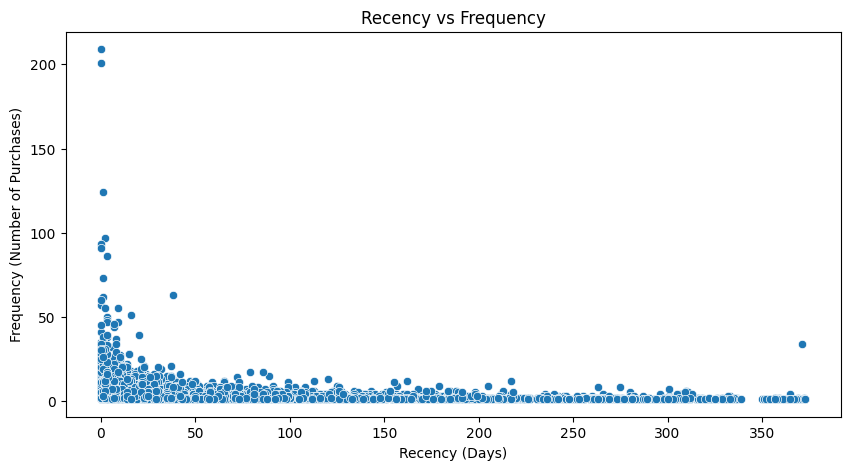

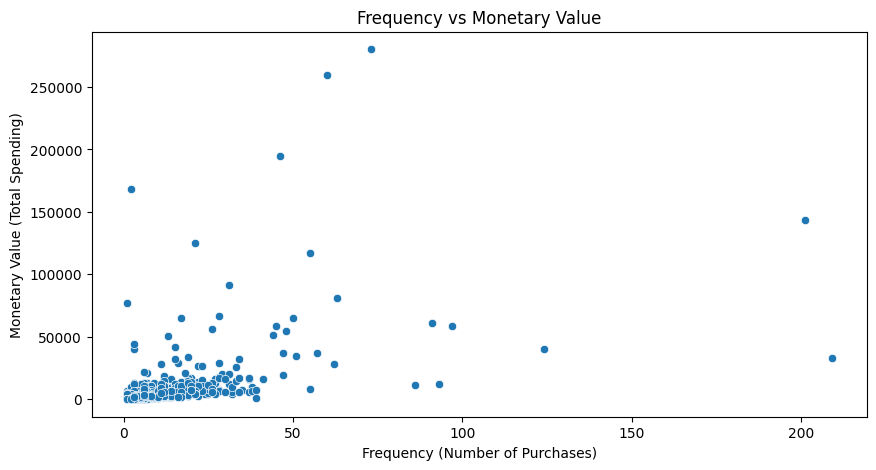

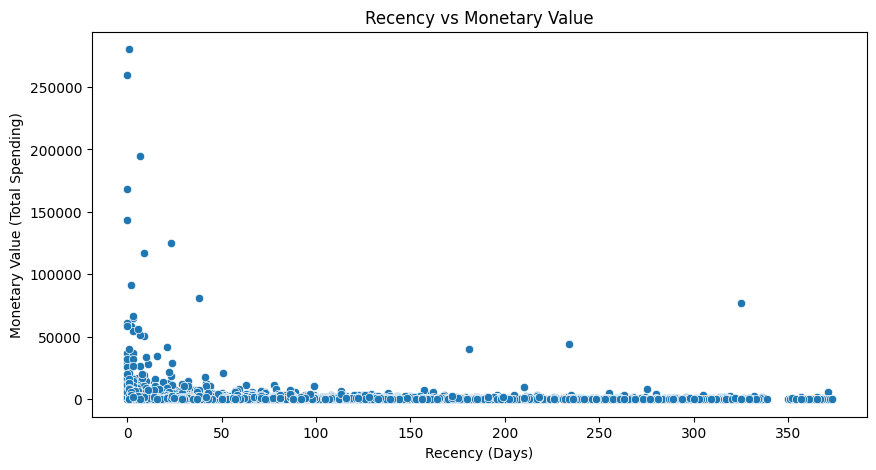

In [ ]:
# visual representation of the distribution of recency, frequency and monetary

import matplotlib.pyplot as plt
import seaborn as sns

def visualize_rfm_distribution(rfm_df):
  """
  Creates visual representations of the distribution of Recency, Frequency, and Monetary value.

  Args:
    rfm_df: A pandas DataFrame containing RFM metrics (Recency, Frequency, Monetary).
  """

  # Histogram of Recency
  plt.figure(figsize=(10, 5))
  sns.histplot(rfm_df['Recency'], bins=20, kde=True)
  plt.title('Distribution of Recency')
  plt.xlabel('Recency (Days)')
  plt.ylabel('Number of Customers')
  plt.show()

  # Histogram of Frequency
  plt.figure(figsize=(10, 5))
  sns.histplot(rfm_df['Frequency'], bins=20, kde=True)
  plt.title('Distribution of Frequency')
  plt.xlabel('Frequency (Number of Purchases)')
  plt.ylabel('Number of Customers')
  plt.show()

  # Histogram of Monetary Value
  plt.figure(figsize=(10, 5))
  sns.histplot(rfm_df['Monetary'], bins=20, kde=True)
  plt.title('Distribution of Monetary Value')
  plt.xlabel('Monetary Value (Total Spending)')
  plt.ylabel('Number of Customers')
  plt.show()

  # Scatter plot of Recency vs Frequency
  plt.figure(figsize=(10, 5))
  sns.scatterplot(x='Recency', y='Frequency', data=rfm_df)
  plt.title('Recency vs Frequency')
  plt.xlabel('Recency (Days)')
  plt.ylabel('Frequency (Number of Purchases)')
  plt.show()

  # Scatter plot of Frequency vs Monetary Value
  plt.figure(figsize=(10, 5))
  sns.scatterplot(x='Frequency', y='Monetary', data=rfm_df)
  plt.title('Frequency vs Monetary Value')
  plt.xlabel('Frequency (Number of Purchases)')
  plt.ylabel('Monetary Value (Total Spending)')
  plt.show()

  # Scatter plot of Recency vs Monetary Value
  plt.figure(figsize=(10, 5))
  sns.scatterplot(x='Recency', y='Monetary', data=rfm_df)
  plt.title('Recency vs Monetary Value')
  plt.xlabel('Recency (Days)')
  plt.ylabel('Monetary Value (Total Spending)')
  plt.show()

# Assuming your RFM dataframe is named 'rfm_df'
visualize_rfm_distribution(rfm_df)

In [ ]:
#perform log transfformation to reduce the skewness of the columns above
rfm_df['Recency_log']= np.log(rfm_df.Recency)
rfm_df['Frequency_log'] = np.log(rfm_df.Frequency)
rfm_df['Monetary_log']= np.log(rfm_df.Monetary)

In [ ]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Sum,Customer_Category,Recency_log,Frequency_log,Monetary_log
0,12346.0,325,1,77183.60,1,1,5,115,7,Medium,5.783825,0.000000,11.253942
1,12347.0,1,7,4310.00,5,5,5,555,15,High,0.000000,1.945910,8.368693
2,12348.0,74,4,1797.24,2,4,4,244,10,Medium,4.304065,1.386294,7.494007
3,12349.0,18,1,1757.55,4,1,4,414,9,Medium,2.890372,0.000000,7.471676
4,12350.0,309,1,334.40,1,1,2,112,4,Low,5.733341,0.000000,5.812338


In [ ]:
rfm_df['Recency_log'] = rfm_df['Recency'].round(2)
rfm_df['Frequency_log'] = rfm_df['Frequency'].round(2)
rfm_df['Monetary_log'] = rfm_df['Monetary'].round(2)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant columns for clustering
X = rfm_df[['Recency_log', 'Frequency_log', 'Monetary_log']]

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# import numpy as np

# Check for NaN values
print("NaN values in dataset: \n", np.isnan(X_scaled).sum())

# Check for infinite values
print("Infinite values in dataset: \n", np.isinf(X_scaled).sum())
# Replace infinite values with NaN
X_scaled = np.where(np.isinf(X_scaled), np.nan, X_scaled)
# Optionally, you can fill NaN values with the column mean
X_scaled = np.nan_to_num(X_scaled, nan=np.nanmean(X_scaled))

NaN values in dataset: 
 0
Infinite values in dataset: 
 0


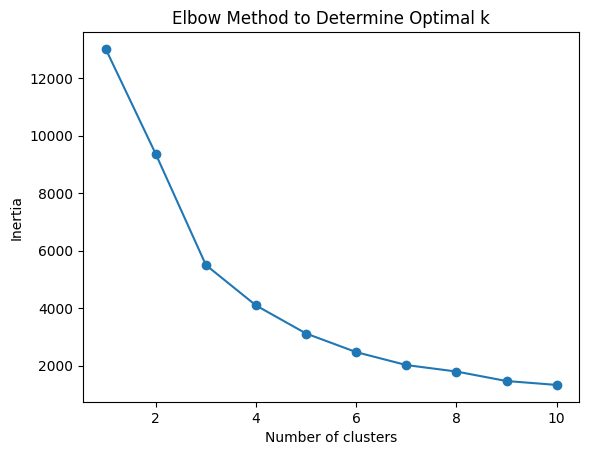

In [ ]:
from sklearn.cluster import KMeans
# Use the elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=42)
    preds = clusterer.fit_predict(X_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_scaled, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5604013068323466
For n_clusters = 3, silhouette score is 0.5853238625916306
For n_clusters = 4, silhouette score is 0.6162275299095438
For n_clusters = 5, silhouette score is 0.6165002474714489
For n_clusters = 6, silhouette score is 0.5982885618417099
For n_clusters = 7, silhouette score is 0.5170880798996614
For n_clusters = 8, silhouette score is 0.4912106826104903
For n_clusters = 9, silhouette score is 0.4784383467194726
For n_clusters = 10, silhouette score is 0.44481636783788875
For n_clusters = 11, silhouette score is 0.4258817423255023
For n_clusters = 12, silhouette score is 0.42381846716998306
For n_clusters = 13, silhouette score is 0.41465724180352725
For n_clusters = 14, silhouette score is 0.41427310911997606
For n_clusters = 15, silhouette score is 0.4145327356651342


In [ ]:
pip install yellowbrick


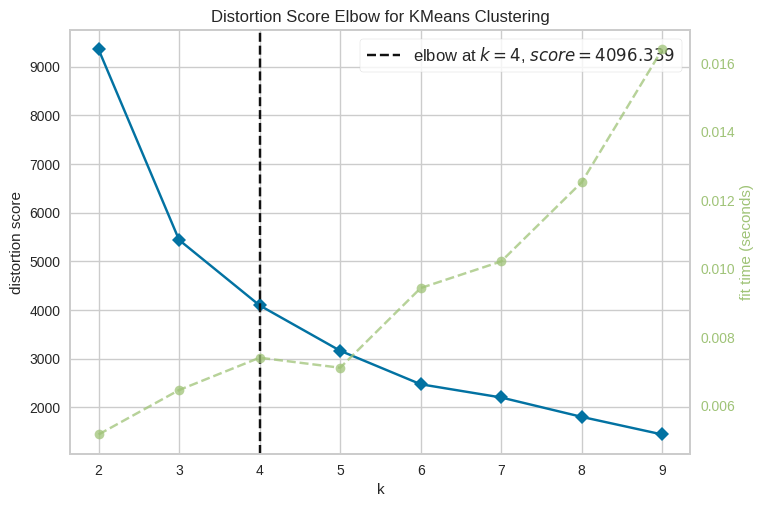

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# Since Yellowbrick works well with KMeans, we'll use it to get an estimate of the optimal number of clusters
model = KMeans()

# Visualize the elbow method to identify the optimal number of clusters
visualizer = KElbowVisualizer(model, k=(2,10))  # You can specify the range of clusters to evaluate
visualizer.fit(X_scaled)  # X_pca is the PCA-transformed data
visualizer.show()


In [ ]:
# # Set the optimal number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model
kmeans.fit(X_scaled)

# Add cluster labels to the original dataframe
rfm_df['Cluster'] = kmeans.labels_
cluster_labels = kmeans.predict(X_scaled)

In [ ]:
# from sklearn.metrics import silhouette_score
# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

print(f"The average silhouette score is: {silhouette_avg}")


The average silhouette score is: 0.6162275299095438


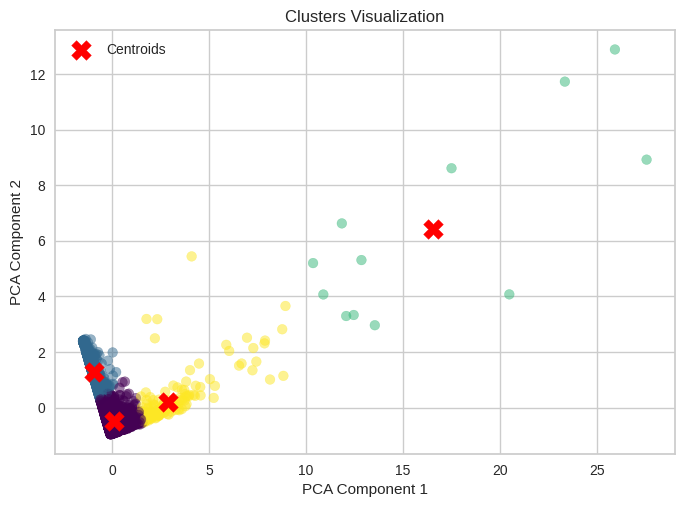

The average silhouette score is: 0.6351136888323218


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)
# Fit KMeans on PCA-transformed data
model = KMeans(n_clusters=4, random_state=42)
model.fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_, cmap='viridis', alpha=0.5)
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
# Calculate the silhouette score
cluster_labels = model.predict(X_pca)
silhouette_avg = silhouette_score(X_pca, cluster_labels)

print(f"The average silhouette score is: {silhouette_avg}")

In [ ]:
from joblib import dump

# Assuming 'kmeans' is your trained KMeans model
dump(model, 'kmeans_model.joblib')


['kmeans_model.joblib']

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
# Fit the Agglomerative Clustering model (already done in your code)
n_clusters = 4
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_model.fit(X_pca)

# Get cluster labels
cluster_labels = hierarchical_model.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)

# Print the silhouette score
print(f"The average silhouette score for hierarchical clustering is: {silhouette_avg}")


The average silhouette score for hierarchical clustering is: 0.6096591390384696


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_methods = ['ward', 'complete', 'average', 'single']  # Try different linkage methods

for method in linkage_methods:
    hierarchical_model = AgglomerativeClustering(n_clusters=4, linkage=method)  # Keep n_clusters constant for comparison
    cluster_labels = hierarchical_model.fit_predict(X_pca)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(f"Linkage method: {method}, Average silhouette score: {silhouette_avg}")


Linkage method: ward, Average silhouette score: 0.6096591390384696
Linkage method: complete, Average silhouette score: 0.7118731361202209
Linkage method: average, Average silhouette score: 0.8583905046278376
Linkage method: single, Average silhouette score: 0.9256105609828252


In [ ]:
# modelling using single linkage method
# Fit the Agglomerative Clustering model (already done in your code)
n_clusters = 4
hierarchical_model2 = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
hierarchical_model2.fit(X_pca)

# Get cluster labels
cluster_labels = hierarchical_model2.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)

# Print the silhouette score
print(f"The average silhouette score for hierarchical clustering is: {silhouette_avg}")

The average silhouette score for hierarchical clustering is: 0.9256105609828252


In [ ]:
#saving the model using joblib
from joblib import dump

# Assuming 'kmeans' is your trained KMeans model
dump(hierarchical_model2, 'hierarchical_model.joblib')


['hierarchical_model.joblib']

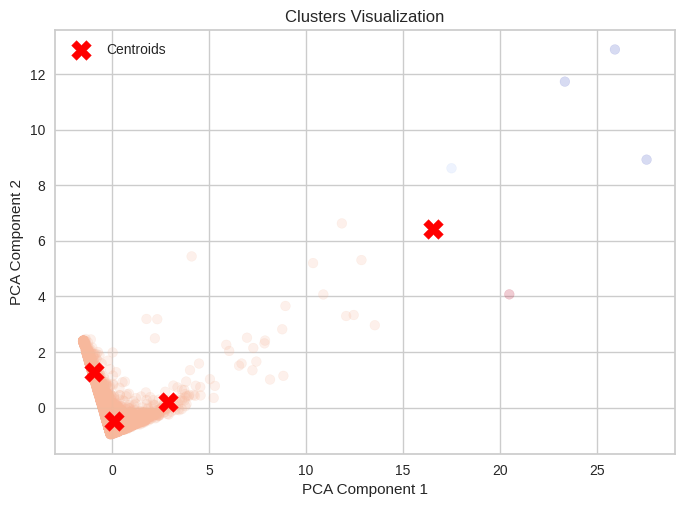

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_model2.labels_, cmap='coolwarm', alpha=0.2)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()